# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [29]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [257]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.25 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

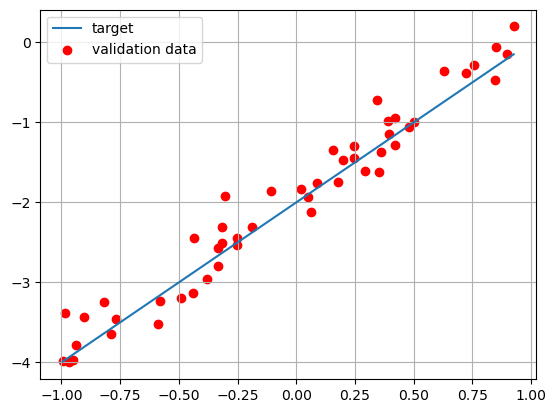

In [258]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [259]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [260]:
# get a summary of our composed model
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)               │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [261]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.1021 - mse: 5.1021 - val_loss: 3.4084 - val_mse: 3.4084
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0605 - mse: 3.0605 - val_loss: 2.1144 - val_mse: 2.1144
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1014 - mse: 2.1014 - val_loss: 1.3830 - val_mse: 1.3830
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5344 - mse: 1.5344 - val_loss: 0.9527 - val_mse: 0.9527
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 0.6892 - val_mse: 0.6892
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7196 - mse: 0.7196 - val_loss: 0.5174 - val_mse: 0.5174
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5687 - mse: 0.5687 - val_loss: 0.4046 - val_mse: 0.4046
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4333 - mse: 0.4333 - val_loss: 0.3248 - val_mse: 0.3248
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3476 

157/157 [==============================] - 0s 3ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 63/150
157/157 [==============================] - 0s 3ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 64/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 65/150
157/157 [==============================] - 1s 3ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 66/150
157/157 [==============================] - 1s 7ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 67/150
157/157 [==============================] - 0s 3ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 68/150
157/157 [==============================] - 0s 3ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 69/150
157/157 [==============================] - 1s 4ms/step - loss:

157/157 [==============================] - 0s 2ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 124/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 125/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 126/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 127/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 128/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 129/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 130/150
157/157 [==============================] - 0s 2ms/step 

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [262]:
# return weights and biases
model.get_weights()

[array([[1.9429785]], dtype=float32), array([-2.0284634], dtype=float32)]

In [263]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0693 - mse: 0.0693

Test loss: 0.07057619839906693
Test accuracy: 0.07057619839906693


In [264]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0013 - mse: 0.0013         

Test loss: 0.0016774265095591545
Test accuracy: 0.0016774265095591545


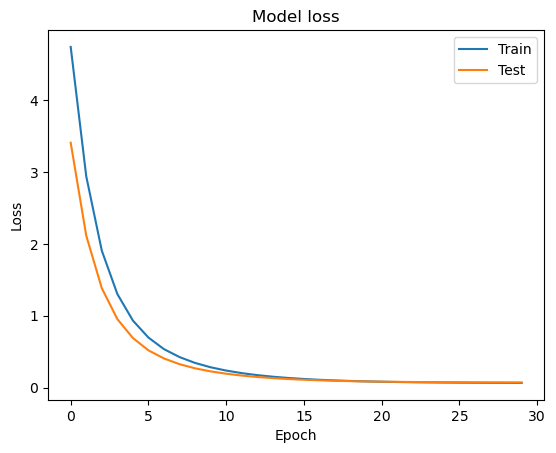

In [265]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [1]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [3]:
# target parameters of f(x) = a*x^3 + b*x^2 +c*x +d
a = 3
b = -2
c = -3
d = 4

In [4]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = a * x_valid**3 + b*x_valid**2 +c*x_valid +d # ideal (target) function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(a * x_train**3 + b*x_train**2 +c*x_train +d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid**3 + b*x_valid**2 +c*x_valid +d, sigma)

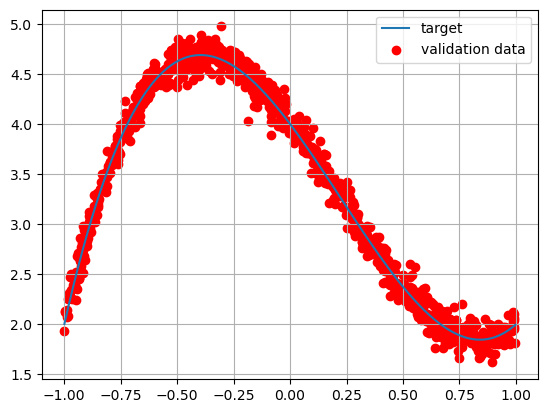

In [5]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(1,),activation='relu'))
model.add(Dropout(0.2))#SPEGNE IL 20% DI NEURONI del layer precedente
model.add(Dense(16))
#model.add(Dropout(0.1))#SPEGNE IL 10% DI NEURONI, tutela contro l'overfitting
model.add(Dense(32,activation='relu'))
model.add(Dense(1,))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2025-07-02 10:21:59.203942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/luca/anaconda3/envs/Simulazione/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [283]:
# get a summary of our composed model
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)               │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,897 (11.32 KB)

 Trainable params: 2,897 (11.32 KB)

 Non-trainable params: 0 (0.00 B)

In [284]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=30, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.1106 - mae: 0.9888 - val_loss: 0.1354 - val_mae: 0.2534
Epoch 2/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1210 - mae: 0.2550 - val_loss: 0.0418 - val_mae: 0.1472
Epoch 3/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0617 - mae: 0.1837 - val_loss: 0.0253 - val_mae: 0.1214
Epoch 4/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0423 - mae: 0.1549 - val_loss: 0.0196 - val_mae: 0.1077
Epoch 5/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0345 - mae: 0.1402 - val_loss: 0.0178 - val_mae: 0.1018
Epoch 6/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0297 - mae: 0.1319 - val_loss: 0.0156 - val_mae: 0.0973
Epoch 7/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0275 - mae: 0.1268 - val_loss: 0.0150 - val_mae: 0.0957
Epoch 8/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0238 - mae: 0.1195 - val_loss: 0.0139 - val_mae: 0.0931
Epoch 9/60
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [285]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=30)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mae: 0.0845 

Test loss: 0.010965651832520962
Test accuracy: 0.08309466391801834


In [286]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=30, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6583e-04 - mae: 0.0211

Test loss: 0.0007871936541050673
Test accuracy: 0.019958384335041046


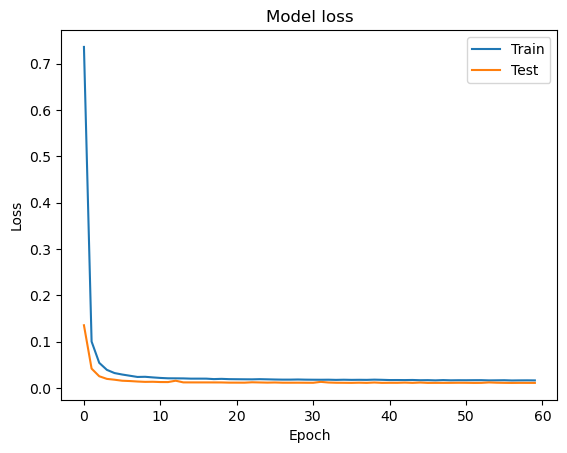

In [287]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step 


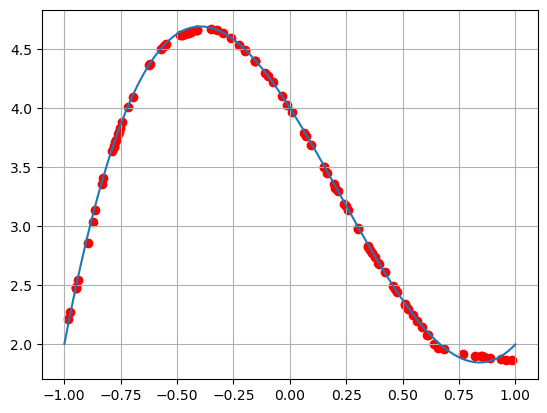

In [290]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [2]:
x_predicted = np.random.uniform(0, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_predicted, y_target)
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

sembra che fuori da -1 a 1 non riesca proprio a prevedere il suo comportamento. Quando si prova a fare deep learning bisogna fare molta attenzione ai dati di training che si hanno e a dove è richiesto di fare test
ohh ora fitta bene chissà perchè. Fa la differenza non mettere activation relu sul layer di mezzo. ok buono a sapersi

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>